# <span style="color:black"> Esercitazioni - lezione 6 </span>

## <span style="color:black"> Esercizio 06.1 </span>

Questo esercizio consiste nell'utilizzare l'algoritmo di Metropolis per simulare un modello di Ising monodimensionale, la cui Hamiltoniana è data da: 
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
dove $J>0$ rappresenta un modello ferromagnetico e $\{s_i\}_{i=1,N}$ sono le variabili riferite agli spin che possono assumere valore 1 o -1, con l'assunzione che $s_{N+1}=s_1$.

N.B. La simulazione è stata eseguita con i valori di $K_b=1$ e $\mu_B=1$.

Il codice fornito è stato completato con l'algoritmo di Metropolis e con quello di Gibbs per campionare il pesi di Boltzmann.  
Nel dettaglio per l'algoritmo di Metropolis si è calcolata una probabilità di accettazione della mossa "cambia il valore di uno spin" data da $$\alpha=min\left\{1, e^{-\beta\left(E(x')-E(x_n)\right)}\right\}$$
dove $E(x')$ è il valore dell'energia avendo cambiato lo spin selezionato e $E(x_n)$ è il valore dell'energia prima di cambiare il valore dello spin.  
Invece l'algoritmo di Gibbs consiste nell' "accettare sempre" la mossa proposta, generata secondo la distribuzione 
$$p\left(x'_k=\pm 1\big|\left\{x_j:j\neq k\right\}\right)=\frac{1}{ 1+e^{\mp\beta \left(E(x')-E(x_k)\right)} }$$

E' stato utilizzato come di norma il metodo di blocchi, utilizzando $10^4$ step Monte Carlo per blocco per evitare correlazioni. In particolare uno step Monte Carlo consiste nel tentativo di cambiare una volta tutti gli spin. Il numero di step totali necessari è stato ricavato andando ad equilibrare il sistema e osservando il numero di blocchi minimo per cui il sistema risulta essere all'equilibrio. I grafici seguenti rappresentano l'andamento di due grandezze scelte - nominalmente energia interna con campo magnetico nullo e magnetizzazione con campo $h=0.02$ - al variare del numero di blocchi a temperatura fissata.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

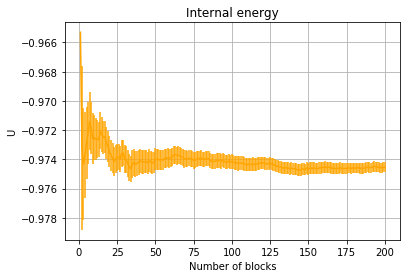

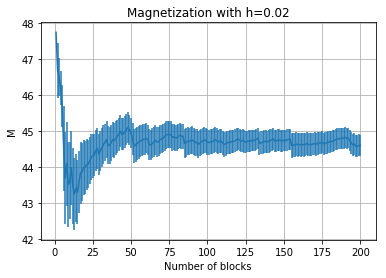

In [5]:
x, f, err = np.loadtxt('equilibration/output.ene.0', usecols=(0,2,3), unpack='true')
plt.errorbar(x, f, yerr=err, label='ene', color='orange')
plt.title('Internal energy')
plt.ylabel('U')
plt.xlabel('Number of blocks')
plt.grid()
plt.show()


x1, f1, err1 = np.loadtxt('equilibration/output.mag.0', usecols=(0,2,3), unpack='true')
plt.errorbar(x1, f1, yerr=err1, label='mag')
plt.title('Magnetization with h=0.02')
plt.ylabel('M')
plt.xlabel('Number of blocks')
plt.grid()
plt.show()

Si nota che utilizzando $10^4$ step Monte Carlo per ogni blocco, dopo 50 blocchi il sistema si può considerare equilibrato. Questo è stato verificato per tutte le temperature comprese tra $0.5$ e $2$. Una volta assicuratici di essere all'equilibrio è possibile calcolare tutte le grandezze termodinamiche come medie statistiche, in particolare l'energia interna $U(N,T)=\langle H\rangle_{h=0}$ , la capacità termica $C(N,T)=\beta^2(\langle H^2\rangle_{h=0}-\langle H\rangle^2_{h=0}) $ , la suscettività magnetica $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$ e da ultimo la magnetizzazione $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$. 

Per valutare l'andamento di queste grandezze al variare della temperatura si è utilizzato un script in python (riportato sotto) per eseguire più volte la simulazione con parametri di input differenti (è stata campionata uniformemente una temperatura compresa tra $0.5\leq T \leq 2$)

Come da richieste, sono state effettuate le simulazioni utilizzando sia il campionamento delle probabilità con l'algoritmo di Metropolis, sia tramite quello di Gibbs, e i risultati sono stati riportati contestualmente.

N.B. Gli script in python sono stati commentati; se si desidera eseguire le simulazioni al momento possono essere scommentati così da vedere i risultati in tempo reale (la durata della simulazione è di circa 2 minuti) altrimenti i risultati di una simulazione precedente sono riportati nei grafici sottostanti.

In [189]:
'''
os.system("./clean.sh")
for i in range (16):
    temp=0.5+i*0.1
    input_text=str(temp) + " \n50 \n1.0 \n0.0 \n1 \n50 \n10000 \n0 \n\n  ReadInput >> temp; \n  ReadInput >> nspin; \n  ReadInput >> J; \n  ReadInput >> h; \n  ReadInput >> metro; \n  ReadInput >> nblk; \n  ReadInput >> nstep; \n  ReadInput >> restart;"
    file = open("input.dat", "w")
    file.write(input_text)
    file.close()
    os.system("./Monte_Carlo_ISING_1D.exe")
os.system("mv output.* MT_out/");
''';

In [190]:
'''
os.system("./clean.sh")
for i in range (16):
    temp=0.5+i*0.1
    input_text=str(temp) + " \n50 \n1.0 \n0.0 \n0 \n50 \n10000 \n0 \n\n  ReadInput >> temp; \n  ReadInput >> nspin; \n  ReadInput >> J; \n  ReadInput >> h; \n  ReadInput >> metro; \n  ReadInput >> nblk; \n  ReadInput >> nstep; \n  ReadInput >> restart;"
    file = open("input.dat", "w")
    file.write(input_text)
    file.close()
    os.system("./Monte_Carlo_ISING_1D.exe")
os.system("mv output.* GB_out/");
''';

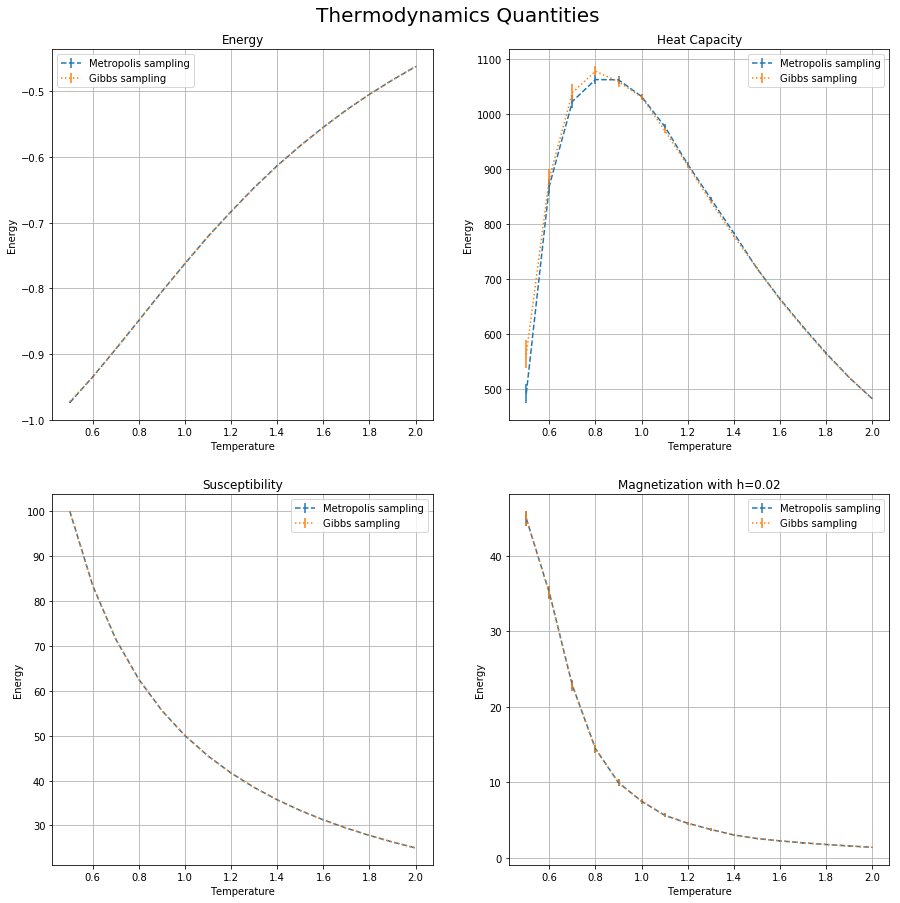

In [183]:
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Thermodynamics Quantities', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(2, 2, figure=fig)

T, en, error1 = np.loadtxt('MT_out/output.ene.Temp', usecols=(0,1,2), unpack='true')
T2, en2, error2 = np.loadtxt('GB_out/output.ene.Temp', usecols=(0,1,2), unpack='true')
ax = fig.add_subplot(gs[0, 0])
plt.errorbar(T, en, yerr=error1, label='Metropolis sampling', fmt='--')
plt.errorbar(T2, en2, yerr=error2, label='Gibbs sampling', fmt=':')
ax.set_xlabel("Temperature")
ax.set_ylabel('Energy')
plt.title("Energy")
ax.legend()
ax.grid()

T, en, error1 = np.loadtxt('MT_out/output.heat.Temp', usecols=(0,1,2), unpack='true')
T2, en2, error2 = np.loadtxt('GB_out/output.heat.Temp', usecols=(0,1,2), unpack='true')
ax2 = fig.add_subplot(gs[0, 1])
plt.errorbar(T, en, yerr=error1, label='Metropolis sampling', fmt='--')
plt.errorbar(T2, en2, yerr=error2, label='Gibbs sampling', fmt=':')
ax2.set_xlabel("Temperature")
ax2.set_ylabel('Energy')
plt.title("Heat Capacity")
ax2.legend()
ax2.grid()

T, en, error1 = np.loadtxt('MT_out/output.chi.Temp', usecols=(0,1,2), unpack='true')
T2, en2, error2 = np.loadtxt('GB_out/output.chi.Temp', usecols=(0,1,2), unpack='true')
ax3 = fig.add_subplot(gs[1, 0])
plt.errorbar(T, en, yerr=error1, label='Metropolis sampling', fmt='--')
plt.errorbar(T2, en2, yerr=error2, label='Gibbs sampling', fmt=':')
ax3.set_xlabel("Temperature")
ax3.set_ylabel('Energy')
plt.title("Susceptibility")
ax3.legend()
ax3.grid()

T, en, error1 = np.loadtxt('mag/output.mag.Temp', usecols=(0,1,2), unpack='true')
T2, en2, error2 = np.loadtxt('mag/output.mag.Temp', usecols=(0,1,2), unpack='true')
ax4 = fig.add_subplot(gs[1, 1])
plt.errorbar(T, en, yerr=error1, label='Metropolis sampling', fmt='--')
plt.errorbar(T2, en2, yerr=error2, label='Gibbs sampling', fmt=':')
ax4.set_xlabel("Temperature")
ax4.set_ylabel('Energy')
plt.title("Magnetization with h=0.02")
ax4.legend()
ax4.grid()

plt.show()

Sono anche state eseguite delle simulazioni a basse temperature ($T<0.5$) in cui si nota che effettivamente l'accettazione dell'algoritmo di Metropolis è molto bassa se non addirittura nulla. Come si può osservare nei grafici sottostanti la simulazione a basse temperature porta quindi a risultati non fisici, come ad esempio un picco nella capacità termica allo zero assoluto.

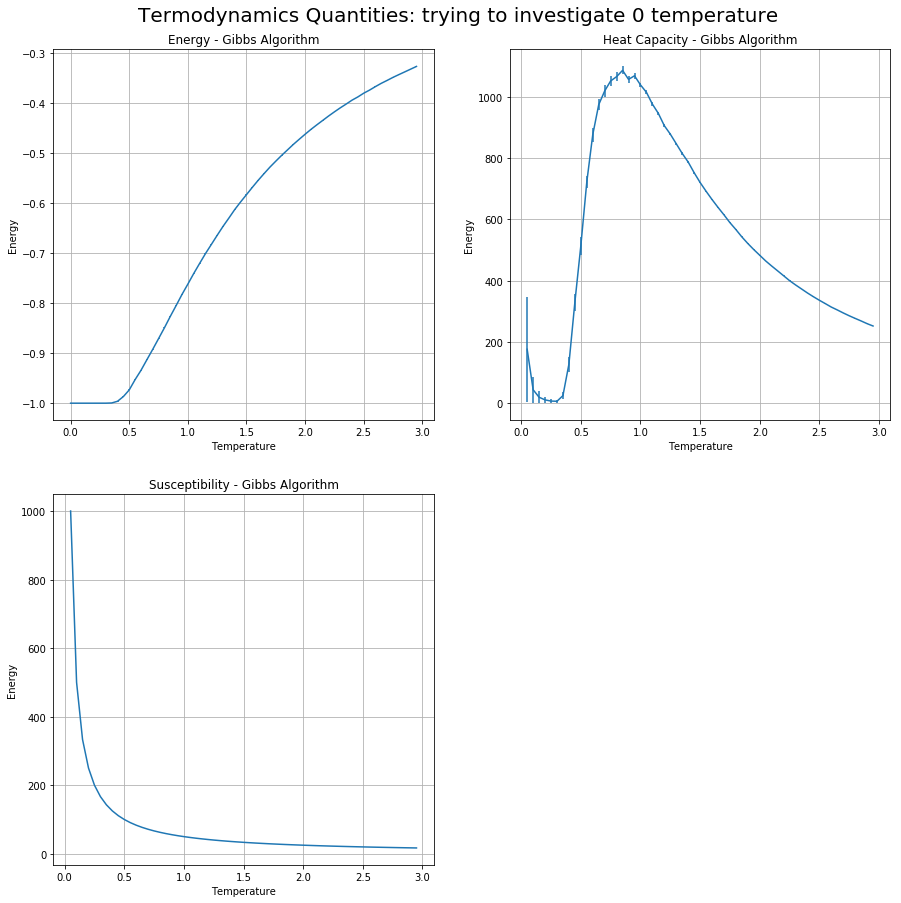

In [4]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15, 15))
fig.suptitle('Termodynamics Quantities: trying to investigate 0 temperature', y='0.92', size='20', weight='20')
gs = gridspec.GridSpec(2, 2, figure=fig)

T, en, error1 = np.loadtxt('temp0/output.ene.Temp', usecols=(0,1,2), unpack='true')
ax = fig.add_subplot(gs[0, 0])
plt.errorbar(T, en, yerr=error1, label='')
ax.set_xlabel("Temperature")
ax.set_ylabel('Energy')
plt.title("Energy - Gibbs Algorithm")
#ax.legend()
ax.grid()

T, en, error1 = np.loadtxt('temp0/output.heat.Temp', usecols=(0,1,2), unpack='true')
ax2 = fig.add_subplot(gs[0, 1])
plt.errorbar(T, en, yerr=error1, label='')
ax2.set_xlabel("Temperature")
ax2.set_ylabel('Energy')
plt.title("Heat Capacity - Gibbs Algorithm")
#ax.legend()
ax2.grid()

T, en, error1 = np.loadtxt('temp0/output.chi.Temp', usecols=(0,1,2), unpack='true')
ax3 = fig.add_subplot(gs[1, 0])
plt.errorbar(T, en, yerr=error1, label='')
ax3.set_xlabel("Temperature")
ax3.set_ylabel('Energy')
plt.title("Susceptibility - Gibbs Algorithm")
#ax.legend()
ax3.grid()

plt.show()